In [1]:
from apex import amp #测试apex安装

In [2]:
import torch
torch.cuda.is_available()
print(torch.version.cuda)

10.2


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import wandb
import logging

In [5]:
#import pymssql

In [7]:
df = pd.read_csv('heat_wave.csv',dtype={'Lable':int,'Content':str}) #读取yuce数据
# df = pd.read_csv('./culture/tt_train.csv',dtype={'Lable':int,'postcontent':str}) #读取训练数据
from sklearn.utils import shuffle #打乱样本顺序
df = shuffle(df)

In [9]:
df.head()
df.shape
print(df)

                                                Content  label  Unnamed: 2  \
1759  我发表了头条文章:《武汉接发羽毛接发随州襄阳荆州黄石汉川监利孝感无痕接发染发烫发》 武汉接发...      0         NaN   
129                                      北京之旅愉快结束啦啦啦，归家      1         NaN   
1484                      衣柜里的衣服越买越多…腰肚上肉也越攒越肥…越来越塞不进去了      0         NaN   
1616                         北京的秋天超冷芦苇荡～超好看～ 北京·野鸭湖湿地公园      0         NaN   
642                                        没有雾霾的故宫当然会更美      1         NaN   
...                                                 ...    ...         ...   
1045                            【英国阅兵更像王室时装秀】 北京·北京京西学校      0         NaN   
515                                      什刹海刘雯?? 北京·什刹海      1         NaN   
679   玉渊潭公园不好玩，西单也不好玩，人太多了不喜欢。又喝到一点点了，快两年没喝到了，想哭。喜茶不...      1         NaN   
414                        今天值得纪念，走过青云胡同，讨个好彩头，哈哈 北京·长阳      1         NaN   
189                                    北京紫竹院公园 北京·紫竹院公园      1         NaN   

      Unnamed: 3 Unnamed: 4  
1759         NaN        NaN  
129

In [10]:
# 划分训练集、验证集和测试集。我们使用 scikit-learn 软件包协助完成
from sklearn.model_selection import train_test_split
# 把全部数据，分成训练和测试集。
train_df,test_df = train_test_split(df, test_size=.2)

In [11]:
# 暂时用这个
from simpletransformers.classification import ClassificationModel   #模型设定2分类
model = ClassificationModel('bert', 'bert-base-chinese', num_labels=2,
    args={"fp16": False,
          "fp16_opt_level": "O1",
          "use_early_stopping" : True,
          "early_stopping_delta": 0.01,
          "early_stopping_metric": "mcc",
          "early_stopping_metric_minimize": False,
          "early_stopping_patience": 5,
          "evaluate_during_training_steps": 1000,
          'max_seq_length': 64,
          'train_batch_size': 16,
          'eval_batch_size': 8,
          'learning_rate':2e-5, 
          'num_train_epochs': 10, #迭代次数
          'logging_steps':50,
          'evaluate_during_training_steps': 2000,
          'save_steps': 200,
          'n_gpu':4,
          'save_model_every_epoch': False ,
          'reprocess_input_data': True, 
          'overwrite_output_dir': True})

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [12]:
model.train_model(train_df)  #训练模型

(1000, 0.07760457373358803)

In [15]:
result, model_outputs, wrong_predictions = model.eval_model(test_df) #评估模型 saved_model
#print(result,model_outputs,wrong_predictions)
print(result)


{'mcc': 0.8856418863110215, 'tp': 199, 'tn': 178, 'fp': 16, 'fn': 7, 'eval_loss': 0.4062531532424327}


confusion [[199, 178], [16, 7]]
len(confusion) 2


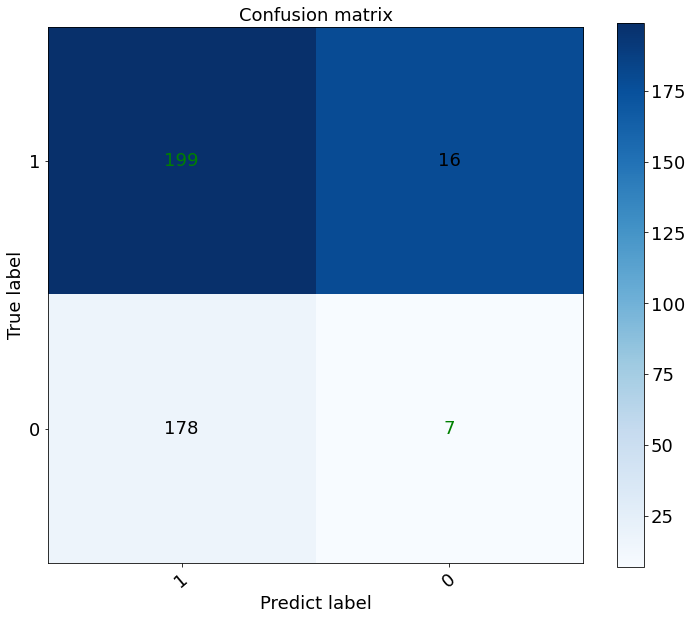

NameError: name 'time' is not defined

In [20]:
tp = result['tp']
tn = result['tn']
fp = result['fp']
fn = result['fn']
import matplotlib.pyplot as plt
guess = ["0", "1"]
fact = ["0", "1"]
classes = list(set(fact))
classes.sort(reverse=True)
r1 = [[tp, tn], [fp, fn]]
plt.figure(figsize=(12,10))       #设置plt窗口的大小
confusion =r1
print("confusion",confusion)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
indices2 = range(3)
plt.xticks(indices, classes,rotation=40,fontsize=18)
plt.yticks([0.00,1.00], classes,fontsize=18)
plt.ylim(1.5 , -0.5)   #设置y的纵坐标的上下限
plt.title("Confusion matrix",fontdict={'weight':'normal','size': 18})
#设置color bar的标签大小
cb=plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.xlabel('Predict label', fontsize=18)
plt.ylabel('True label', fontsize=18)

print("len(confusion)",len(confusion))
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):

        if first_index==second_index:
            color="green"
        else:
            color="black"
        plt.text(first_index, second_index, confusion[first_index][second_index],fontsize=18, color = color,verticalalignment='center',horizontalalignment='center',)
plt.show()
print (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

In [16]:
import sklearn
result, model_outputs, wrong_predictions = model.eval_model(test_df,acc=sklearn.metrics.accuracy_score) #评估模型 saved_model

In [17]:
df_prediction = pd.read_csv('all.csv',dtype={'id':int,'Content':str})  #读取预测数据

#注意，csv文件的这个字段是"Content"

In [18]:
from simpletransformers.classification import ClassificationModel   #模型设定
saved_model = ClassificationModel('bert', 'outputs/', args={})

In [19]:
#import openpyxL
predictions, raw_outputs = saved_model.predict(df_prediction.Content) #预测
resul_df = pd.DataFrame(predictions, columns = ['Predict']) 
resultdf = pd.concat([df_prediction, resul_df], axis=1, join='inner')
resultdf.to_csv("result.csv", index = False) #预测结果输出
# resultdf.to_excel("result_airpollutionhealth.", index = False) #预测结果输出